## Get the data

### Download the data

In [1]:
# downloading data function
import os
import urllib.request
import tarfile
import pandas as pd
import matplotlib.pyplot as plt

dataset_folder = '/Users/dvorasindmitrij/PycharmProjects/pythonProject/datasets'

def download_data(url, filename, folder):
    # create folder for dataset
    path = os.path.join(dataset_folder, folder)
    print('path: ' + path)
    os.makedirs(path, exist_ok=True)
    
    # path of local file
    full_path = os.path.join(path, filename)
    print('full path: ' + full_path)
    
    # full url of donwloaded file
    full_url = url + folder + '/' + filename
    print('full url: ' + full_url)
    
    urllib.request.urlretrieve(full_url, full_path) # downloading
    
    archive = tarfile.open(full_path, "r:gz")
    archive.extractall(path=path)
    archive.close()

In [2]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/'
filename = 'housing.tgz'
folder = 'housing'
download_data(url, filename, folder)

path: /Users/dvorasindmitrij/PycharmProjects/pythonProject/datasets/housing
full path: /Users/dvorasindmitrij/PycharmProjects/pythonProject/datasets/housing/housing.tgz
full url: https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [3]:
csv_path = os.path.join(dataset_folder, folder) + '/housing.csv'
df = pd.read_csv(csv_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Explore the data

In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


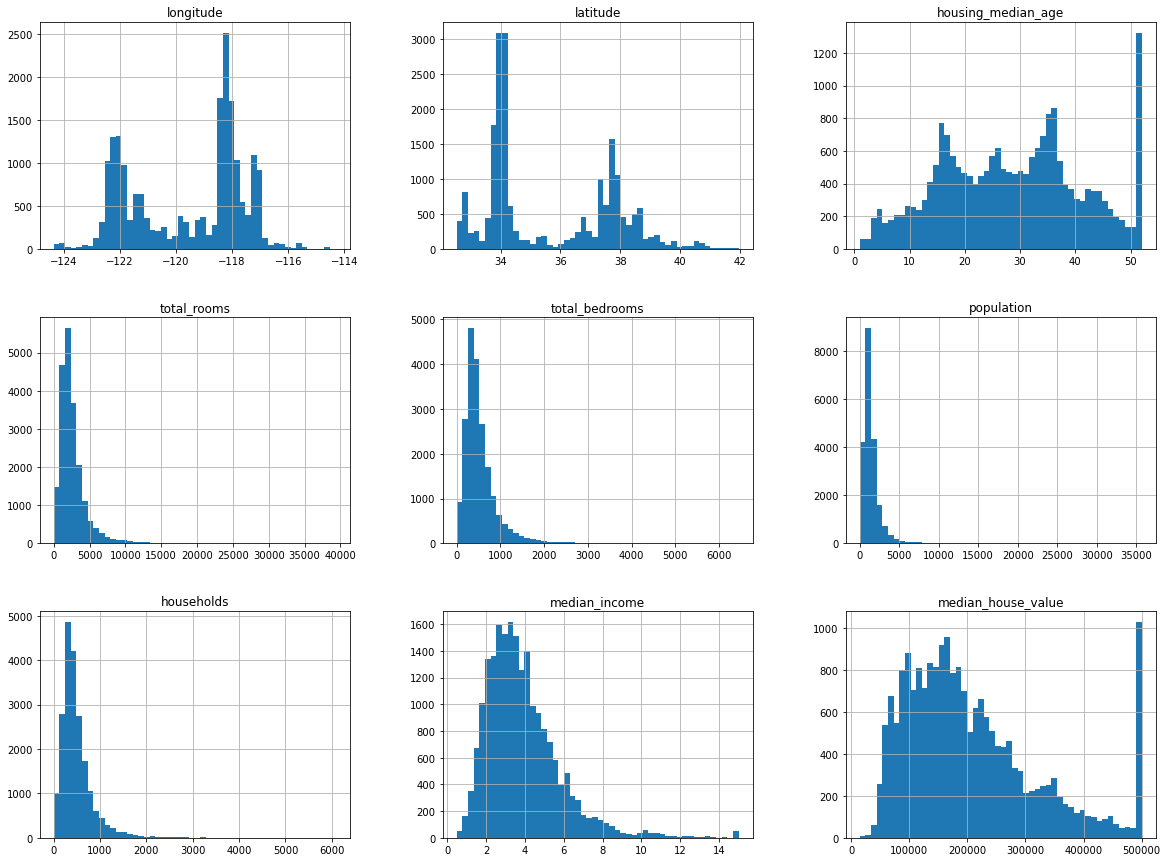

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Test set

In [7]:
# create test set using train_test_split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print(str(len(df_train)) + ' ' + str(len(df_test)))

16512 4128


In [8]:
# add bins by median_income
import numpy as np
df['bin_income'] = pd.cut(df['median_income'],
                          bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                          labels=[1, 2, 3, 4, 5])
df.groupby('bin_income').agg('count')['longitude']

bin_income
1     822
2    6581
3    7236
4    3639
5    2362
Name: longitude, dtype: int64

In [9]:
# create stratified test set using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_ind, test_ind in sss.split(df, df['bin_income']):
    df_train = df.loc[train_ind]
    df_test = df.loc[test_ind]

df_train.drop('bin_income', axis=1, inplace=True)
df_test.drop('bin_income', axis=1, inplace=True)
    
print(str(len(df_train)) + ' ' + str(len(df_test)))

16512 4128


## Gain insights

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

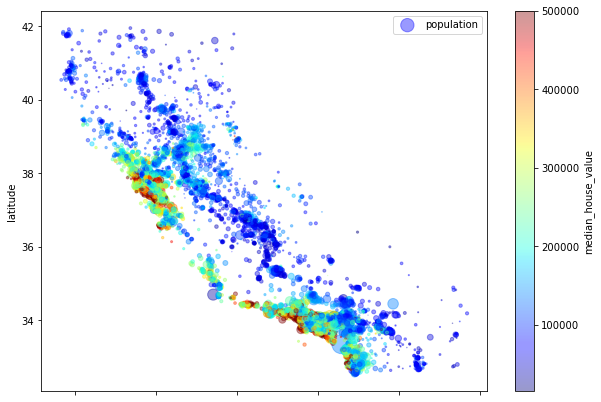

In [10]:
# plot longitude, latitude, population and median_house_value with scatter plot
df_train.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,7), label='population',
              alpha=0.4, s=df_train['population']/100, c='median_house_value', cmap='jet')

### Correlations

In [11]:
# find the most correlated with median_house_value features
corr_matrix = df_train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

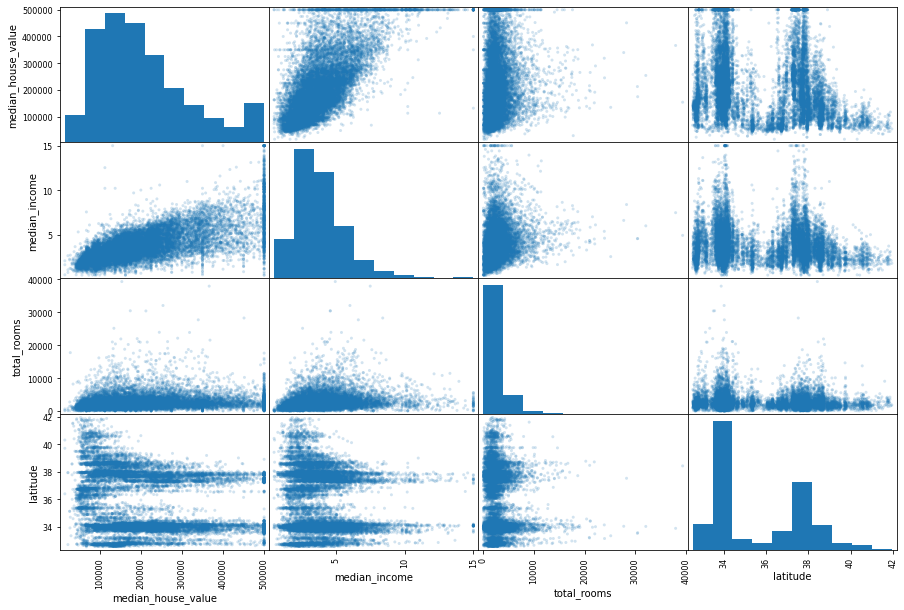

In [12]:
# build graph of most correlated features
pd.plotting.scatter_matrix(df_train[['median_house_value', 'median_income', 'total_rooms', 'latitude']], 
                           figsize=(15,10), alpha=0.2)
plt.show()

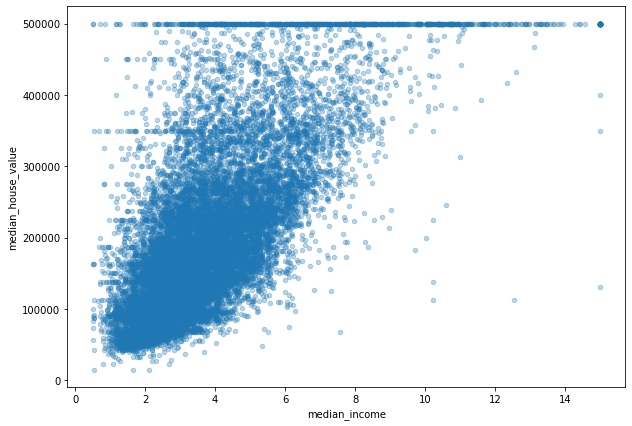

In [13]:
# zoom in on the strangest
df_train.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.3, figsize=(10,7))
plt.show()

### Add new features

In [14]:
df_train['rooms_per_household'] = df_train['total_rooms']/df_train['households']
df_train['bedrooms_per_room'] = df_train['total_bedrooms']/df_train['total_rooms']
df_train['population_per_household'] = df_train['population']/df_train['households']
df_train.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Prepare the data

In [15]:
# getting train/test sets once again
for train_ind, test_ind in sss.split(df, df['bin_income']):
    df_train = df.loc[train_ind]
    df_test = df.loc[test_ind]

df_train.drop('bin_income', axis=1, inplace=True)
df_test.drop('bin_income', axis=1, inplace=True)

housing = df_train.drop('median_house_value', axis=1)
housing_labels = df_train['median_house_value'].copy()

### Data Cleaning

In [16]:
# use imputer and fill missing values with medians
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
housing_imp = pd.DataFrame(imputer.transform(housing_num), 
                           index=housing_num.index, 
                           columns=housing_num.columns)
housing_imp['ocean_proximity'] = housing['ocean_proximity'].copy()
housing_imp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [115]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [117]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

### Handling Text and Categorical Attributes

In [17]:
# OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[['ocean_proximity']]
ord_enc = OrdinalEncoder()
ord_enc.fit(housing_cat)
ord_enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [18]:
ord_enc.transform(housing_cat) # not the best option of encoding

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [19]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(housing_cat[['ocean_proximity']])
ohe.transform(housing_cat).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [20]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [23]:
ohe_columns = [x.lower() for x in ohe.get_feature_names_out(['ocean_proximity'])]
ohe_columns = [x.replace(' ', '_').replace('<', '') for x in ohe_columns]
ohe_columns

['ocean_proximity_1h_ocean',
 'ocean_proximity_inland',
 'ocean_proximity_island',
 'ocean_proximity_near_bay',
 'ocean_proximity_near_ocean']

In [24]:
housing_cat_enc = pd.DataFrame(ohe.transform(housing_cat).toarray(),
                               index=housing_cat.index,
                               columns=ohe_columns)
housing_cat_enc.head()

,ocean_proximity_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0


### Custom Transformers

In [25]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [41]:
for c in housing.columns:
    print(c + ': ' 
          + str(housing[c].dtype) + '; ' 
          + str(housing[c].dtype in ('float64', 'int64')) + '; ' 
          + str(housing[c].dtype == 'object'))

longitude: float64; True; False
latitude: float64; True; False
housing_median_age: float64; True; False
total_rooms: float64; True; False
total_bedrooms: float64; True; False
population: float64; True; False
households: float64; True; False
median_income: float64; True; False
ocean_proximity: object; False; True


In [125]:
# write custom pipeline with BaseEstimator and TransformerMixin as base classes
from sklearn.base import BaseEstimator, TransformerMixin

class TransformerPipeline(BaseEstimator, TransformerMixin):
    #def __init__(self, add_bedrooms_per_room=True):
    #    self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        num_cols = []
        cat_cols = []
        
        # getting cat and num columns
        for c in X.columns:
            if X[c].dtype in ('float64', 'int64'):
                num_cols.append(c)
            elif X[c].dtype == 'object':
                cat_cols.append(c)
            else:
                print('ERROR: Unknown type')
        
        # impute
        imputer = SimpleImputer(strategy='median')
        imputer.fit(X[num_cols])
        X_imp = pd.DataFrame(imputer.transform(X[num_cols]),
                             columns=X[num_cols].columns,
                             index=X[num_cols].index)
        
        imputer_values = {}
        for i in range(len(imputer.statistics_)):
            imputer_values[imputer.feature_names_in_[i]] = imputer.statistics_[i]
        
        # encoding
        ohe = OneHotEncoder()
        ohe.fit(X[cat_cols])
        ohe_columns = [x.lower() for x in ohe.get_feature_names_out(cat_cols)]
        ohe_columns = [x.replace(' ', '_').replace('<', '') for x in ohe_columns]
        X_enc = pd.DataFrame(ohe.transform(X[cat_cols]).toarray(), 
                             columns=ohe_columns,
                             index=X[cat_cols].index)
        
        # combine and add features
        X_out = pd.concat([X_imp, X_enc], axis=1)
        X_out['bedrooms_per_rooms'] = X_out['total_bedrooms']/X_out['total_rooms']
        X_out['rooms_per_household'] = X_out['total_rooms']/X_out['households']
        X_out['pops_per_household'] = X_out['population']/X_out['households']
        
        return X_out, imputer_values

In [126]:
cust_transformer = TransformerPipeline()
housing_cust_tr, imputer_values = cust_transformer.transform(housing)
housing_cust_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean,bedrooms_per_rooms,rooms_per_household,pops_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0,0.205784,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0,0.160714,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0,0.191595,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0,0.276505,3.886128,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0,0.182692,6.096552,3.167241


In [127]:
imputer_values

{'longitude': -118.51,
 'latitude': 34.26,
 'housing_median_age': 29.0,
 'total_rooms': 2119.0,
 'total_bedrooms': 433.0,
 'population': 1164.0,
 'households': 408.0,
 'median_income': 3.54155}

### Transformation Pipelines + Feature Scaling

In [131]:
housing.values[:, 3]

array([3873.0, 5320.0, 1618.0, ..., 707.0, 3155.0, 1079.0], dtype=object)

In [132]:
# write custom attributes adder

rooms_ix, bedrooms_ix, pops_ix, households_ix = 3, 4, 5, 6

class AttributesAdder(BaseEstimator, TransformerMixin):
    #def __init__(self, add_bedrooms_per_room=True):
    #    self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        bedrooms_per_rooms = X[:, bedrooms_ix]/X[:, rooms_ix]
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        pops_per_household = X[:, pops_ix]/X[:, households_ix]
        
        return np.c_[X, bedrooms_per_rooms, rooms_per_household, pops_per_household]

In [135]:
# Pipeline for numerical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', AttributesAdder()),
    ('scaler', StandardScaler())
])

In [136]:
# Full pipeline
from sklearn.compose import ColumnTransformer

num_cols = []
cat_cols = []

# getting cat and num columns
for c in housing.columns:
    if housing[c].dtype in ('float64', 'int64'):
        num_cols.append(c)
    elif housing[c].dtype == 'object':
        cat_cols.append(c)
    else:
        print(f'ERROR in column {c}: Unknown type')

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

In [177]:
# columns from OneHotEncoder
ohe_columns = full_pipeline.transformers_[1][1].get_feature_names_out()
ohe_columns = [x.lower() for x in ohe_columns]
ohe_columns = [x.replace('<', '').replace(' ', '_') for x in ohe_columns]

# columns from AttributesAdder
added_columns = ['bedrooms_per_rooms', 'rooms_per_household', 'pops_per_household']

# all columns
list(housing[num_cols].columns) + added_columns + ohe_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_rooms',
 'rooms_per_household',
 'pops_per_household',
 'ocean_proximity_1h_ocean',
 'ocean_proximity_inland',
 'ocean_proximity_island',
 'ocean_proximity_near_bay',
 'ocean_proximity_near_ocean']

In [179]:
housing_prepared = pd.DataFrame(full_pipeline.fit_transform(housing),
                                columns=list(housing[num_cols].columns) + added_columns + ohe_columns,
                                index=housing.index)

In [180]:
housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_rooms,rooms_per_household,pops_per_household,ocean_proximity_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.121122,0.017395,0.006223,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,-0.810867,0.569256,-0.040811,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.338273,-0.018024,-0.075371,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.961205,-0.595140,-0.106803,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.474513,0.251241,0.006109,1.0,0.0,0.0,0.0,0.0


In [192]:
# imputer values
imputer_values = {}
imputer_statistics = full_pipeline.transformers_[0][1].named_steps['imputer'].statistics_
imputer_feature_names = full_pipeline.transformers_[0][1].named_steps['imputer'].feature_names_in_

for i in range(len(imputer_statistics)):
    imputer_values[imputer_feature_names[i]] = imputer_statistics[i]
    
imputer_values

{'longitude': -118.51,
 'latitude': 34.26,
 'housing_median_age': 29.0,
 'total_rooms': 2119.0,
 'total_bedrooms': 433.0,
 'population': 1164.0,
 'households': 408.0,
 'median_income': 3.54155}

## Select and Train a Model

### Training and Evaluating on the Training Set

In [197]:
# Make predictions with lin reg and compute RMSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(housing_prepared, housing_labels)
lin_pred = lin_model.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, lin_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68627.87390018745


In [198]:
# Make predictions with DecisionTreeRegressor and compute RMSE
from sklearn.tree import DecisionTreeRegressor

dtree_model = DecisionTreeRegressor()
dtree_model.fit(housing_prepared, housing_labels)
dtree_pred = dtree_model.predict(housing_prepared)
dtree_mse = mean_squared_error(housing_labels, dtree_pred)
dtree_rmse = np.sqrt(dtree_mse)
print(dtree_rmse)

0.0


### Cross-Validation

In [208]:
def scores_describe(scores):
    print('Scores: ' + str(scores))
    print('Mean: ' + str(scores.mean()))
    print('Standard Deviation: ' + str(scores.std()))

In [213]:
# Linear
from sklearn.model_selection import cross_val_score

cv_lin_mse = cross_val_score(lin_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
cv_lin_rmse = np.sqrt(-cv_lin_mse)
scores_describe(cv_lin_rmse)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard Deviation: 2880.3282098180653


In [216]:
# Decision Tree
cv_dtree_mse = cross_val_score(dtree_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
cv_dtree_rmse = np.sqrt(-cv_dtree_mse)
scores_describe(cv_dtree_rmse)

Scores: [72318.6879139  70140.01238901 67910.30484561 71626.7280183
 68953.68596231 77170.79033294 70877.66758384 72943.9320709
 69680.25604528 71059.62387007]
Mean: 71268.16890321634
Standard Deviation: 2439.3348633777437


In [215]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(housing_prepared, housing_labels)
rf_pred = rf_model.predict(housing_prepared)
rf_mse = mean_squared_error(housing_labels, rf_pred)
rf_rmse = np.sqrt(rf_mse)
print(rf_rmse)

cv_rf_mse = cross_val_score(rf_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
cv_rf_rmse = np.sqrt(-cv_rf_mse)
scores_describe(cv_rf_rmse)

18780.40291973177
Scores: [51502.59701945 48912.21140296 46778.77216178 51818.96815255
 47724.947987   52175.71400828 52432.32588993 49603.430297
 48501.00591742 53961.55636788]
Mean: 50341.15292042465
Standard Deviation: 2233.5210900417055


## Fine-tune Model

### Grid Search

In [377]:
# use GridSearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 40], 'max_depth': [2, 4, 6, 8, 10]}
]
rf_model = RandomForestRegressor()
grid_cv = GridSearchCV(rf_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_cv.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 40]}],
             scoring='neg_mean_squared_error')

In [378]:
print(min(np.sqrt(-grid_cv.cv_results_['mean_test_score'])))

53616.77099341729


In [379]:
for score, params in zip(grid_cv.cv_results_['mean_test_score'], grid_cv.cv_results_['params']):
    print(np.sqrt(-score), params)

81788.26843090043 {'max_depth': 2, 'n_estimators': 3}
81454.88718337132 {'max_depth': 2, 'n_estimators': 10}
81194.61661333364 {'max_depth': 2, 'n_estimators': 30}
81248.48818973184 {'max_depth': 2, 'n_estimators': 40}
68863.7815213191 {'max_depth': 4, 'n_estimators': 3}
68077.29795394123 {'max_depth': 4, 'n_estimators': 10}
67771.6795826113 {'max_depth': 4, 'n_estimators': 30}
67837.43831331722 {'max_depth': 4, 'n_estimators': 40}
62217.005600456905 {'max_depth': 6, 'n_estimators': 3}
60913.8642729123 {'max_depth': 6, 'n_estimators': 10}
60927.55930975503 {'max_depth': 6, 'n_estimators': 30}
60834.14482600695 {'max_depth': 6, 'n_estimators': 40}
59270.40895327414 {'max_depth': 8, 'n_estimators': 3}
57096.15987335499 {'max_depth': 8, 'n_estimators': 10}
56429.22787980228 {'max_depth': 8, 'n_estimators': 30}
56597.435969104685 {'max_depth': 8, 'n_estimators': 40}
58081.75724868233 {'max_depth': 10, 'n_estimators': 3}
54799.49618739283 {'max_depth': 10, 'n_estimators': 10}
53666.09280045

### Analyze the Best Model and Apply to Test Set

In [364]:
# feature importances
f_imp = grid_cv.best_estimator_.feature_importances_
sorted(list(zip(f_imp, housing_prepared.columns)), reverse=True)

[(0.5335702203973882, 'median_income'),
 (0.16344759273577464, 'ocean_proximity_inland'),
 (0.12369994183235096, 'pops_per_household'),
 (0.04603188284560648, 'longitude'),
 (0.039711501951799864, 'latitude'),
 (0.038885392569017456, 'housing_median_age'),
 (0.015790149714219905, 'rooms_per_household'),
 (0.011171451151297498, 'bedrooms_per_rooms'),
 (0.007146643217086112, 'households'),
 (0.006385162554574571, 'total_bedrooms'),
 (0.006149228413598104, 'total_rooms'),
 (0.005729716104051279, 'population'),
 (0.0015015350767212314, 'ocean_proximity_near_ocean'),
 (0.0005191637377837495, 'ocean_proximity_1h_ocean'),
 (0.000260417698729872, 'ocean_proximity_near_bay'),
 (0.0, 'ocean_proximity_island')]

In [243]:
# test set results
X_test = df_test.drop('median_house_value', axis=1)
y_test = df_test[['median_house_value']]
print(str(len(X_test.columns)) + '; ' + str(len(y_test.columns)))

X_test_prepared = full_pipeline.transform(X_test)
test_pred = grid_cv.best_estimator_.predict(X_test_prepared)

test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_rmse

9; 1


/Users/dvorasindmitrij/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


51799.371757871544

In [246]:
test_pred

array([481705.13815227, 248619.94450253, 224340.19144571, ...,
       401261.45972372, 236176.62646312, 222565.70741836])

In [251]:
y_test.iloc[:, 0]

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: median_house_value, Length: 4128, dtype: float64

In [254]:
# confidence interval
from scipy import stats
alpha = 0.95
squared_errors = (test_pred - y_test.iloc[:, 0]) ** 2
np.sqrt(stats.t.interval(alpha, 
                         len(squared_errors)-1, 
                         loc=squared_errors.mean(), 
                         scale=stats.sem(squared_errors)))

array([49741.69164889, 53778.37800573])

## Exercises

### SVM regressor + Grid Search CV

In [262]:
from sklearn.svm import SVR

param_grid_svm = [
    {'kernel': ['linear'], 'C': [0.5, 1.0, 2.0, 5.0]},
    {'kernel': ['poly'], 'C': [0.5, 1.0, 2.0, 5.0]},
    {'kernel': ['rbf'], 'C': [0.5, 1.0, 2.0, 5.0]}
]
svm_model = SVR()
grid_svm = GridSearchCV(svm_model, param_grid_svm, scoring='neg_mean_squared_error', cv=5)
grid_svm.fit(housing_prepared, housing_labels)

print(min(np.sqrt(-grid_svm.cv_results_['mean_test_score'])))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...C=0.5, kernel=linear;, score=-13354145332.992 total time=   8.7s
[CV 2/5] END ...C=0.5, kernel=linear;, score=-12990497345.744 total time=   8.5s
[CV 3/5] END ...C=0.5, kernel=linear;, score=-13405563821.247 total time=   8.4s
[CV 4/5] END ...C=0.5, kernel=linear;, score=-13494365398.014 total time=   8.5s
[CV 5/5] END ...C=0.5, kernel=linear;, score=-13558271561.459 total time=   8.5s
[CV 1/5] END ...C=1.0, kernel=linear;, score=-12667210738.780 total time=   8.4s
[CV 2/5] END ...C=1.0, kernel=linear;, score=-12305416725.715 total time=   8.4s
[CV 3/5] END ...C=1.0, kernel=linear;, score=-12715602668.938 total time=   8.4s
[CV 4/5] END ...C=1.0, kernel=linear;, score=-12824022285.862 total time=   8.5s
[CV 5/5] END ...C=1.0, kernel=linear;, score=-12848969590.328 total time=   8.4s
[CV 1/5] END ...C=2.0, kernel=linear;, score=-11492128353.750 total time=   8.4s
[CV 2/5] END ...C=2.0, kernel=linear;, score=-11

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.5, 1.0, 2.0, 5.0], 'kernel': ['linear']},
                         {'C': [0.5, 1.0, 2.0, 5.0], 'kernel': ['poly']},
                         {'C': [0.5, 1.0, 2.0, 5.0], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=4)

In [286]:
print(str(grid_svm.best_estimator_) + '; RMSE: ' + str(min(np.sqrt(-grid_svm.cv_results_['mean_test_score']))))

SVR(C=5.0, kernel='linear'); RMSE: 95054.54067013338


### RandomizedSearchCV

In [266]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_randcv_rf = {'n_estimators': randint(2, 40),
                   'max_depth': randint(2, 10)}
randcv_rf = RandomizedSearchCV(rf_model, param_randcv_rf, n_iter=15, cv=5, scoring='neg_mean_squared_error')
randcv_rf.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcf4b17ffd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcf2d13c6d0>},
                   scoring='neg_mean_squared_error')

In [288]:
print(str(randcv_rf.best_estimator_) + '; RMSE: ' + str(min(np.sqrt(-randcv_rf.cv_results_['mean_test_score']))))

RandomForestRegressor(max_depth=9, n_estimators=25); RMSE: 54986.38132841712


In [271]:
test_pred_randcv = randcv_rf.best_estimator_.predict(X_test_prepared)

test_mse_randcv = mean_squared_error(y_test, test_pred_randcv)
test_rmse_randcv = np.sqrt(test_mse_randcv)
test_rmse_randcv

/Users/dvorasindmitrij/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


52974.06792216402

In [290]:
# confidence interval
alpha = 0.95
squared_errors_randcv = (test_pred_randcv - y_test.iloc[:, 0]) ** 2
np.sqrt(stats.t.interval(alpha, 
                         len(squared_errors_randcv)-1, 
                         loc=squared_errors_randcv.mean(), 
                         scale=stats.sem(squared_errors_randcv)))

array([50919.30321683, 54952.05459632])

### Add to transformation pipeline choosing features by importance

In [360]:
class AttributesChoice(BaseEstimator, TransformerMixin):
    
    #def __init__(self, cols_ok):
    #    self.cols_ok = cols_ok
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[:, imp_cols_ix]

In [301]:
# feature importances
#f_imp = grid_cv.best_estimator_.feature_importances_
sorted(list(zip(f_imp, housing_prepared.columns)), reverse=True)

[(0.5335702203973882, 'median_income'),
 (0.16344759273577464, 'ocean_proximity_inland'),
 (0.12369994183235096, 'pops_per_household'),
 (0.04603188284560648, 'longitude'),
 (0.039711501951799864, 'latitude'),
 (0.038885392569017456, 'housing_median_age'),
 (0.015790149714219905, 'rooms_per_household'),
 (0.011171451151297498, 'bedrooms_per_rooms'),
 (0.007146643217086112, 'households'),
 (0.006385162554574571, 'total_bedrooms'),
 (0.006149228413598104, 'total_rooms'),
 (0.005729716104051279, 'population'),
 (0.0015015350767212314, 'ocean_proximity_near_ocean'),
 (0.0005191637377837495, 'ocean_proximity_1h_ocean'),
 (0.000260417698729872, 'ocean_proximity_near_bay'),
 (0.0, 'ocean_proximity_island')]

In [346]:
# getting indeces of columns with importance >= 0.01
imp_cols_ix = []
imp_cols = []
for value, col in list(zip(f_imp, housing_prepared.columns)):
    if value >= 0.01:
        imp_cols_ix.append(list(housing_prepared.columns).index(col))
        imp_cols.append(col)
    
for col, ix in zip(imp_cols, imp_cols_ix):
    print(col + ': ' + str(ix))

longitude: 0
latitude: 1
housing_median_age: 2
median_income: 7
bedrooms_per_rooms: 8
rooms_per_household: 9
pops_per_household: 10
ocean_proximity_inland: 12


In [362]:
final_pipeline = Pipeline([
    ('full_pipeline', full_pipeline),
    ('attribs_choice', AttributesChoice())
])

housing_prep_short = pd.DataFrame(final_pipeline.fit_transform(housing),
                                columns=imp_cols,
                                index=housing.index)

In [363]:
housing_prep_short

,longitude,latitude,housing_median_age,median_income,bedrooms_per_rooms,rooms_per_household,pops_per_household,ocean_proximity_inland
12655,-0.941350,1.347438,0.027564,-0.893647,-0.121122,0.017395,0.006223,1.0
15502,1.171782,-1.192440,-1.722018,1.292168,-0.810867,0.569256,-0.040811,0.0
2908,0.267581,-0.125972,1.220460,-0.525434,-0.338273,-0.018024,-0.075371,1.0
14053,1.221738,-1.351474,-0.370069,-0.865929,0.961205,-0.595140,-0.106803,0.0
20496,0.437431,-0.635818,-0.131489,0.325752,-0.474513,0.251241,0.006109,0.0
...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,0.637374,-0.443846,0.466353,-0.092580,0.0
12661,-0.921368,1.342761,-1.085806,-0.557509,-0.516065,0.050362,0.023024,1.0
19263,-1.570794,1.310018,1.538566,-0.365475,0.322869,-0.509240,-0.037436,0.0
19140,-1.560803,1.249211,-1.165333,0.168261,-0.457023,0.328149,-0.059156,0.0


### Create pipeline with prediction

In [386]:
# refitting Random Forest on important features

param_grid = [
    {'n_estimators': [3, 10, 30, 40, 50], 'max_depth': [2, 4, 6, 8, 10, 12]}
]
#rf_model = RandomForestRegressor()
grid_cv_imp = GridSearchCV(rf_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_cv_imp.fit(housing_prep_short, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10, 30, 40, 50]}],
             scoring='neg_mean_squared_error')

In [387]:
min(np.sqrt(-grid_cv_imp.cv_results_['mean_test_score']))

52020.207352971076

In [388]:
grid_cv_imp.best_estimator_

RandomForestRegressor(max_depth=12, n_estimators=50)

In [390]:
pred_pipeline = Pipeline([
    ('full_pipeline', full_pipeline),
    ('attribs_choice', AttributesChoice()),
    ('prediction', grid_cv_imp.best_estimator_)
])

pred_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   AttributesAdder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                              

In [391]:
test_pred_short = pred_pipeline.predict(X_test)
test_pred_mse = mean_squared_error(y_test, test_pred_short)
test_pred_rmse = np.sqrt(test_pred_mse)
test_pred_rmse

49598.245191342554

### Explore preparation options using GridSearchCV

In [ ]:
for strat in ['mean', 'median', 'most_frequent', 'constant']:
    simple_imputer = SimpleImputer(strategy=strat)
    imputers.append((f'impute_{strat}', simple_imputer))

In [395]:
from sklearn.preprocessing import MinMaxScaler
for s in [StandardScaler(), MinMaxScaler()]:
    print(type(s))

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.MinMaxScaler'>


In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', AttributesAdder()),
    ('scaler', StandardScaler())
])

In [ ]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

In [ ]:
final_pipeline = Pipeline([
    ('full_pipeline', full_pipeline),
    ('attribs_choice', AttributesChoice())
])

In [400]:
temp_list = []
temp_list.append(('abc', '123'))
temp_list[0]
del temp_list

In [418]:
# generate pipelines with different data preparation steps
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def get_pipelines(model, num_cols, cat_cols):
    # num_pipeline
    num_pipelines = []
    scalers_dict = {'std_scaler': StandardScaler(),
                    'minmax_scaler': MinMaxScaler()}
    
    for strat in ['mean', 'median', 'most_frequent', 'constant']:
        for s_name, scaler in scalers_dict.items():
            num_pipelines.append(Pipeline([
                (f'impute_{strat}', SimpleImputer(strategy=strat)), 
                (f'{s_name}', scaler)
            ]))
    
    
    # encoders
    encoders = []
    encoders_dict = {'ohe': OneHotEncoder(),
                     'le': LabelEncoder(),
                     'oe': OrdinalEncoder()}
    for e_name, encoder in encoders_dict.items():
        encoders.append((f'{e_name}', encoder))
    
    
    # column transformer
    pipelines = []
    n = 0
    for num_p in num_pipelines:
        for enc_name, enc in encoders_dict.items():
            pipelines.append(ColumnTransformer([
                (f'num_pipeline_{n}', num_p, num_cols),
                (f'{enc_name}_encoder', enc, cat_cols)
            ]))
        n+=1
    
    
    # full_pipeline
    
    return pipelines

In [419]:
rf_model = RandomForestRegressor()
pipelines = get_pipelines(rf_model, [0, 1, 2], [3, 4, 5])
pipelines

[ColumnTransformer(transformers=[('num_pipeline_0',
                                  Pipeline(steps=[('impute_mean',
                                                   SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]),
                                  [0, 1, 2]),
                                 ('ohe_encoder', OneHotEncoder(), [3, 4, 5])]),
 ColumnTransformer(transformers=[('num_pipeline_0',
                                  Pipeline(steps=[('impute_mean',
                                                   SimpleImputer()),
                                                  ('std_scaler',
                                                   StandardScaler())]),
                                  [0, 1, 2]),
                                 ('le_encoder', LabelEncoder(), [3, 4, 5])]),
 ColumnTransformer(transformers=[('num_pipeline_0',
                                  Pipeline(steps=[

In [ ]:
# use grid search to find best pipeline